In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qcodes as qc
import time
import qcodes.instrument_drivers.nplab_drivers as npd

In [2]:
npd.triton_init('srframe', 'lockin865', 'lockin830')

Connected to: OXFORD INSTRUMENTS Triton (serial:N/A, firmware:2.449) in 0.03s
Connected to: Stanford_Research_Systems SIM900 (serial:s/n152150, firmware:ver3.6) in 1.08s
Connected to: Stanford_Research_Systems SR865A (serial:003538, firmware:V1.51) in 0.05s
Connected to: Stanford_Research_Systems SR830 (serial:s/n49840, firmware:ver1.07) in 0.04s


Some issue with cooling down. It appears the software was not properly opening/closing valves and turning on/off the pumps. Specifically the forepump wasn't responsive when I tried turning it on/off, and possibly some valves too, leading to improper cooling. I restarted the software and restarted a full cooldown

In [27]:
triton.read_temps()

MC - on:  0.0770466 K
MC_cernox - off:  1.21336 K
still - on:  0.947525 K
cold_plate - on:  0.164984 K
magnet - on:  4.25243 K
PT2h - off:  3.38927 K
PT2p - off:  3.60434 K
PT1h - off:  46.9746 K
PT1p - off:  64.6333 K


In [23]:
srframe.volt_p1.step = 0.08
srframe.volt_p1.inter_delay = 0.1
srframe.volt_p5.step = 0.08
srframe.volt_p5.inter_delay = 0.1

In [ ]:
station = qc.Station('Triton', 'srframe', 'lockin865', 'lockin830')

In [33]:
srframe.volt_p1(0)

In [25]:
srframe.volt_p5()

0.0

In [28]:
gvals = np.linspace(-15, 15, 301)
data1, plot1 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, DataName='M08_41-43_basetemp_0T')

Started at 2019-10-28 18:15:27
DataSet:
   location = 'data/2019-10-28/#001_M08_41-43_basetemp_0T_18-15-24'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-28 18:23:48


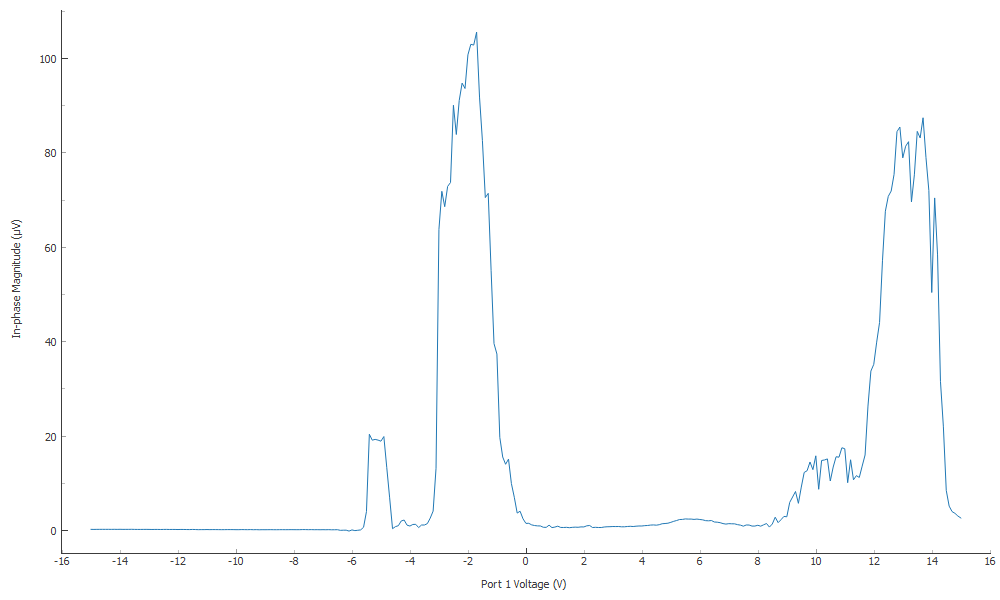

In [29]:
plot1[0]

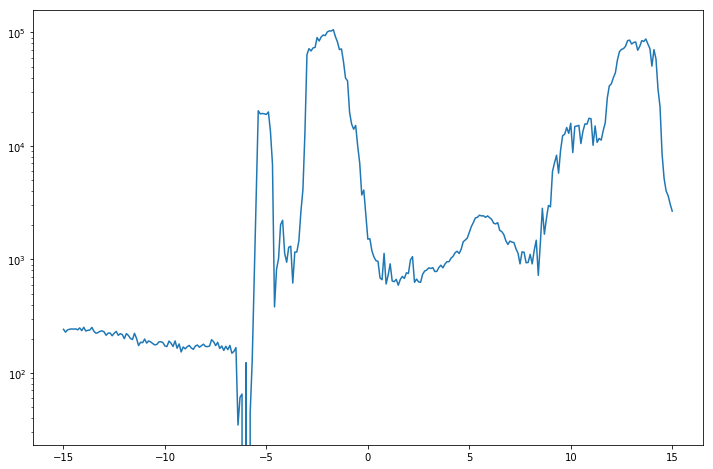

In [30]:
g41_43 = data1.srframe_volt_p1_set[:]
R41_43 = data1.lockin865_X[:]/1e-9
plt.figure(figsize=(12,8))
plt.semilogy(g41_43, R41_43)

In [32]:
gvals = np.linspace(-15, 15, 301)
data2, plot2 = npd.single_param_sweep(srframe.volt_p1, gvals, 1, lockin865.X, lockin865.Y, DataName='M08_41-43__current_40basetemp_0T')

Started at 2019-10-28 18:25:44
DataSet:
   location = 'data/2019-10-28/#002_M08_41-43__current_40basetemp_0T_18-25-43'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-28 18:32:34


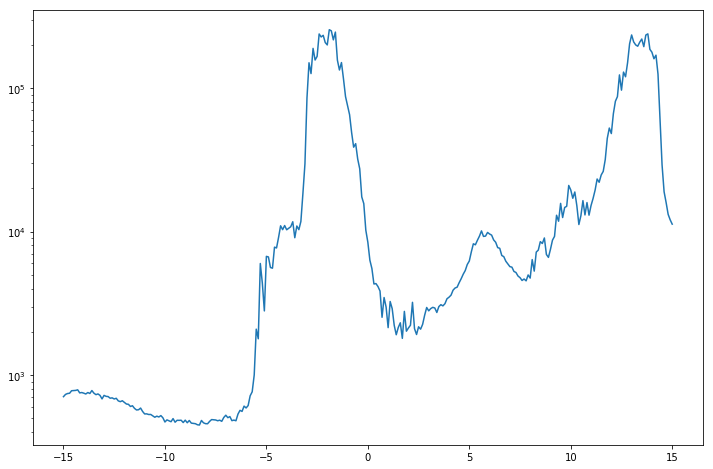

In [34]:
g41_43_2 = data2.srframe_volt_p1_set[:]
R41_43_2 = data2.lockin865_X[:]/1e-9
plt.figure(figsize=(12,8))
plt.semilogy(g41_43_2, R41_43_2)

Started at 2019-10-28 18:39:01
DataSet:
   location = 'data/2019-10-28/#003_M05_21-20_basetemp_0T_18-39-00'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-28 18:45:52


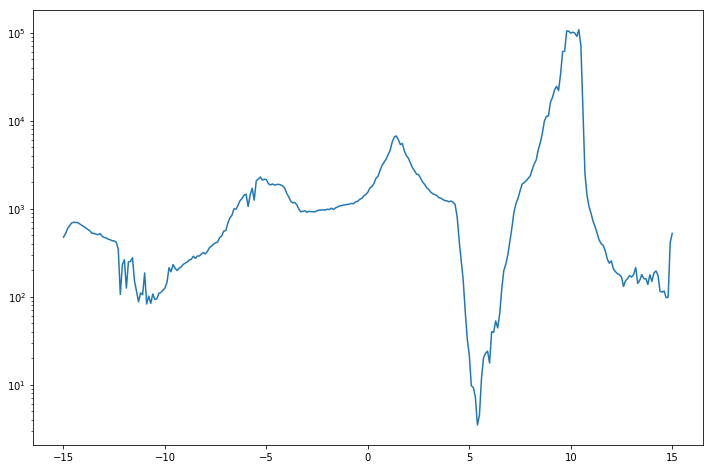

In [35]:
gvals = np.linspace(-15, 15, 301)
data3, plot3 = npd.single_param_sweep(srframe.volt_p1, gvals, 1, lockin865.X, lockin865.Y, DataName='M05_21-20_basetemp_0T')
srframe.volt_p1(0)
g21_20 = data3.srframe_volt_p1_set[:]
R21_20 = data3.lockin865_X[:]/1e-9
plt.figure(figsize=(12,8))
plt.semilogy(g21_20, R21_20)

In [36]:
gvals = np.linspace(-15, 15, 301)
data4, plot4 = npd.single_param_sweep(srframe.volt_p1, gvals, 1, lockin865.X, lockin865.Y, DataName='M08_35-36__current_40basetemp_0T')

Started at 2019-10-28 18:56:06
DataSet:
   location = 'data/2019-10-28/#004_M08_35-36__current_40basetemp_0T_18-56-06'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-28 19:02:57


In [37]:
srframe.volt_p1(0)

In [38]:
lockin865.amplitude(0)

In [39]:
triton.MC_temp()

51.5342

In [41]:
triton.MC_cernox_temp()

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host